In [1]:
import pandas as pd
import seaborn as sns

/var/folders/2k/rv2cxkh11f99ykv5445b628c0000gn/T/ipykernel_3328/432526209.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("/Users/rishavjain/Desktop/sampling/Creditcard_data.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
temp = data['Class'].value_counts().reset_index()
temp

,Class,count
0,0,763
1,1,9


<Axes: xlabel='Class', ylabel='count'>

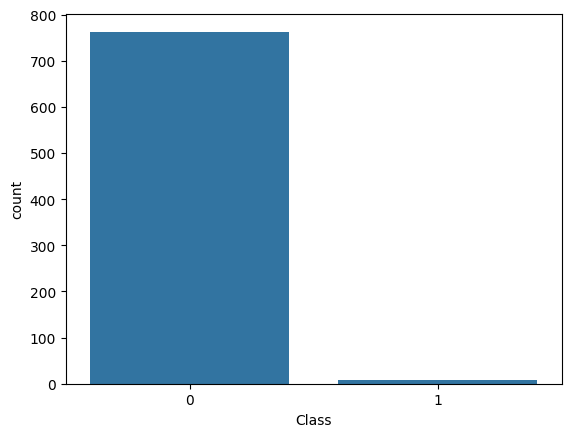

In [5]:
sns.barplot(x= temp['Class'] ,y= temp['count'])

This graph shows that the data is very unbalanced.

In [6]:
from imblearn.over_sampling import SMOTE

# Assuming df is your DataFrame with a 'Class' column
# X contains the features, and y contains the target variable
X = data.drop(columns=['Class'])  # Features
y = data['Class']  # Target variable

# Instantiate SMOTE
smote = SMOTE()

# Perform oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Class'])], axis=1)


In [7]:
temp1 = resampled_df['Class'].value_counts().reset_index()
temp1

,Class,count
0,0,763
1,1,763


<Axes: xlabel='Class', ylabel='count'>

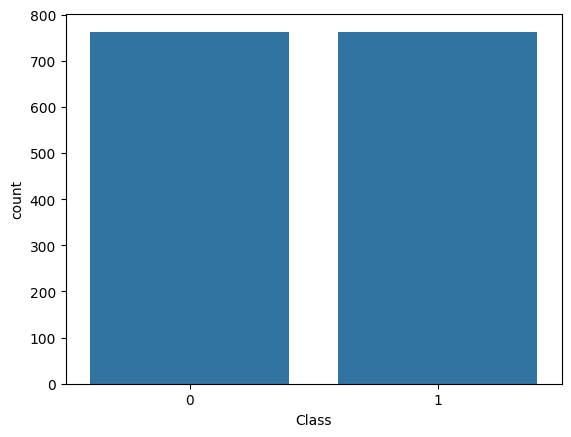

In [8]:
sns.barplot(x= temp1['Class'] ,y= temp1['count'])

In [9]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler,ClusterCentroids,EditedNearestNeighbours
from imblearn.combine import SMOTEENN

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.95, 0.05], random_state=42)

# Define sample size detection formula
# For demonstration, let's assume it's a fixed percentage of the total dataset
sample_size = len(X) // 5  # Adjust this based on your sample size detection formula

# Create five samples
samples = [X[:sample_size], X[sample_size:2*sample_size], X[2*sample_size:3*sample_size], 
           X[3*sample_size:4*sample_size], X[4*sample_size:]]

# Split each sample into training and testing sets
sample_train_test = [(train_test_split(sample_X, y[:sample_size], test_size=0.2, random_state=42)) for sample_X in samples]

# Define sampling techniques
sampling_techniques = [RandomOverSampler(), SMOTE(), EditedNearestNeighbours(), RandomUnderSampler(), ClusterCentroids(), SMOTEENN()]
sampling_names = [sampler.__class__.__name__ for sampler in sampling_techniques]

# Define machine learning models
models = [DecisionTreeClassifier(), RandomForestClassifier(), SVC(), DecisionTreeClassifier(), RandomForestClassifier()]
model_names = [model.__class__.__name__ for model in models]
# Store accuracy in a DataFrame
accuracy_df = pd.DataFrame(columns=['Model'] + sampling_names)

# Apply sampling techniques and train models
for i, (X_train, X_test, y_train, y_test) in enumerate(sample_train_test):
    print(f"\nSample {i+1}:")
    accuracies = []
    for sampler, sampler_name in zip(sampling_techniques, sampling_names):
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        model = models[i % len(models)]  # Wrap around model index
        model.fit(X_resampled, y_resampled)
        accuracy = model.score(X_test, y_test)
        accuracies.append(accuracy)
    accuracy_df.loc[i] = [model_names[i % len(models)]] + accuracies

print(accuracy_df.reset_index())



Sample 1:

Sample 2:

Sample 3:

Sample 4:

Sample 5:
   index                   Model  RandomOverSampler  SMOTE  \
0      0  DecisionTreeClassifier              0.900  0.950   
1      1  RandomForestClassifier              0.975  0.975   
2      2                     SVC              0.975  0.950   
3      3  DecisionTreeClassifier              0.900  0.900   
4      4  RandomForestClassifier              0.975  0.975   

   EditedNearestNeighbours  RandomUnderSampler  ClusterCentroids  SMOTEENN  
0                    0.925               0.900             0.825     0.900  
1                    0.975               0.525             0.525     0.875  
2                    0.975               0.550             0.250     0.925  
3                    0.875               0.550             0.575     0.800  
4                    0.975               0.275             0.475     0.850  


In [10]:
# Save the DataFrame to a CSV file
accuracy_df.to_csv('accuracy_results.csv', index=False)
